In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [107]:
url = 'Tcs_train_data.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 7:8].values

In [108]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [135]:
X_train = []
y_train = []
for i in range(30, len(training_set)):
    X_train.append(training_set_scaled[i-30:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [136]:
y_train.shape

(166,)

In [137]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [138]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [139]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [140]:
model.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
166/166 [==============================] - 6s 34ms/step - loss: 0.2026 - accuracy: 0.0060
Epoch 2/10
166/166 [==============================] - 1s 5ms/step - loss: 0.1157 - accuracy: 0.0060
Epoch 3/10
166/166 [==============================] - 1s 5ms/step - loss: 0.0924 - accuracy: 0.0060
Epoch 4/10
166/166 [==============================] - 1s 5ms/step - loss: 0.0654 - accuracy: 0.0060
Epoch 5/10
166/166 [==============================] - 1s 5ms/step - loss: 0.0771 - accuracy: 0.0060
Epoch 6/10
166/166 [==============================] - 1s 5ms/step - loss: 0.0621 - accuracy: 0.0060
Epoch 7/10
166/166 [==============================] - 1s 5ms/step - loss: 0.0645 - accuracy: 0.0120
Epoch 8/10
166/166 [==============================] - 1s 5ms/step - loss: 0.0577 - accuracy: 0.0000e+00
Epoch 9/10
166/166 [==============================] - 1s 4ms/step - loss: 0.0637 - accuracy: 0.0000e+00
Epoch 10/10
166/166 [==============================] - 1s 4ms/step - loss: 0.0640 - accurac

In [127]:
# evaluate the model
#print("Accuracy is ",model.evaluate(X_train, y_train, verbose=0))


In [141]:
url = 'Tcs_test_data.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 7:8].values

In [142]:
dataset_total = pd.concat((dataset_train['High Price'], dataset_test['High Price']), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 30:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []

for i in range(30, len(real_stock_price)):
    X_test.append(inputs[i-30:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [143]:
real_stock_price.shape

(49, 1)

In [144]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [150]:
print('Predicted stock price',predicted_stock_price[:5],"Real stock Price",real_stock_price[:5])


Predicted stock price [[2114.2695]
 [2113.7637]
 [2113.746 ]
 [2113.329 ]
 [2112.6833]] Real stock Price [[2094.5 ]
 [2147.15]
 [2003.25]
 [2166.5 ]
 [2093.2 ]]


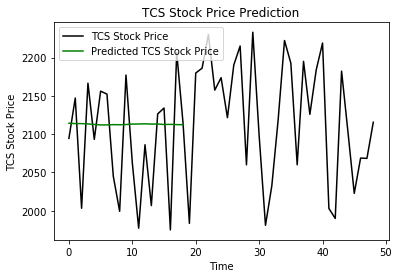

In [151]:
plt.plot(real_stock_price, color = 'black', label = 'TCS Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TCS Stock Price')
plt.title('TCS Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TCS Stock Price')
plt.legend()